In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

##Load and normalize data

In [16]:
path = r'/Users/horczech/Desktop/coursea/Tensorflow_and_machineLearning/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv'
data = pd.read_csv(path)


cols_to_normalise = ['Number_pregnant',
                     'Glucose_concentration',
                     'Blood_pressure',
                     'Triceps',
                     'Insulin',
                     'BMI',
                     'Pedigree']

data[cols_to_normalise] = data[cols_to_normalise].apply(lambda x: (x-x.min())/(x.max()-x.min()))

## Create feature cols

In [17]:
# continuous feature values
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# categorical features
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)


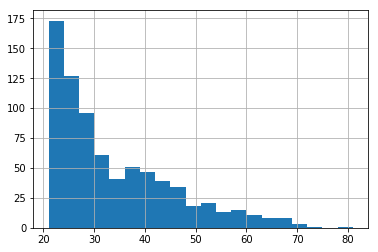

In [19]:
data['Age'].hist(bins=20)


In [20]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])
# put all feature collumns together
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]


# do the test split
x_data = data.drop('Class', axis=1)
labels = data['Class']

X_train, X_test, y_train, y_test = train_test_split( x_data, labels, test_size=0.3, random_state=101)

## Create DNN classifier 

In [21]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': '/var/folders/ts/2bkdqvxj4qvfkg0y5x_cpw1w0000gn/T/tmpl3hthd4k', '_save_checkpoints_steps': None}


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': '/var/folders/ts/2bkdqvxj4qvfkg0y5x_cpw1w0000gn/T/tmpr5qv_hdc', '_save_checkpoints_steps': None}


In [22]:
dnn_model.train(input_fn=input_func,steps=1000)


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/ts/2bkdqvxj4qvfkg0y5x_cpw1w0000gn/T/tmpr5qv_hdc/model.ckpt.


INFO:tensorflow:loss = 9.25296, step = 1


INFO:tensorflow:global_step/sec: 288.707


INFO:tensorflow:loss = 6.52841, step = 101 (0.350 sec)


INFO:tensorflow:global_step/sec: 298.247


INFO:tensorflow:loss = 6.24413, step = 201 (0.333 sec)


INFO:tensorflow:global_step/sec: 327.528


INFO:tensorflow:loss = 2.82285, step = 301 (0.307 sec)


INFO:tensorflow:global_step/sec: 360.507


INFO:tensorflow:loss = 3.98209, step = 401 (0.284 sec)


INFO:tensorflow:global_step/sec: 303.563


INFO:tensorflow:loss = 7.72734, step = 501 (0.327 sec)


INFO:tensorflow:global_step/sec: 259.614


INFO:tensorflow:loss = 7.1417, step = 601 (0.385 sec)


INFO:tensorflow:global_step/sec: 284.096


INFO:tensorflow:loss = 9.2106, step = 701 (0.356 sec)


INFO:tensorflow:global_step/sec: 253.967


INFO:tensorflow:loss = 2.82752, step = 801 (0.386 sec)


INFO:tensorflow:global_step/sec: 295.81


INFO:tensorflow:loss = 2.70397, step = 901 (0.336 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/ts/2bkdqvxj4qvfkg0y5x_cpw1w0000gn/T/tmpr5qv_hdc/model.ckpt.


INFO:tensorflow:Loss for final step: 3.65105.


In [30]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-10-18-10:39:47


INFO:tensorflow:Restoring parameters from /var/folders/ts/2bkdqvxj4qvfkg0y5x_cpw1w0000gn/T/tmpr5qv_hdc/model.ckpt-1000


INFO:tensorflow:Finished evaluation at 2018-10-18-10:39:48


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.830658, auc_precision_recall = 0.694858, average_loss = 0.492338, global_step = 1000, label/mean = 0.350649, loss = 4.73875, prediction/mean = 0.342336


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83065844,
 'auc_precision_recall': 0.69485807,
 'average_loss': 0.49233815,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7387547,
 'prediction/mean': 0.34233579}